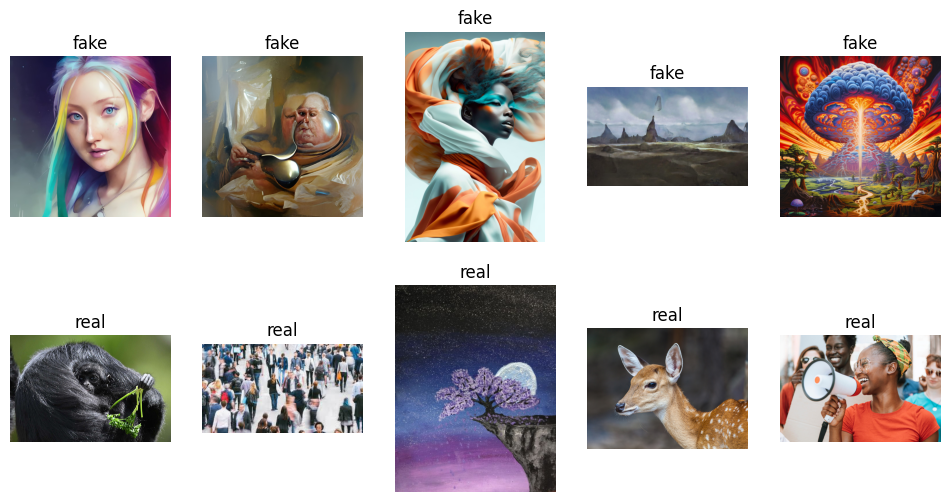

In [ ]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
import numpy as np
# Define dataset path
dataset_path = "data/Video_Data"  # Update with your dataset path

# List categories (fake & real)
categories = [category for category in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, category))]

# Load sample images (filter out directories)
sample_images = []
for category in categories:
    class_path = os.path.join(dataset_path, category)
    images = [img for img in os.listdir(class_path) if img.lower().endswith(('.png', '.jpg', '.jpeg'))]  # Filter image files
    for img in images[:5]:  # Limit to first 5 images per category
        img_path = os.path.join(class_path, img)
        sample_images.append((img_path, category))

# Display sample images
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i, (img_path, label) in enumerate(sample_images):
    img = load_img(img_path)
    ax = axes[i // 5, i % 5]
    ax.imshow(img)
    ax.set_title(label)
    ax.axis("off")
plt.show()

In [2]:
from sklearn.model_selection import train_test_split
IMG_SIZE = (128, 128)  # Resize images
BATCH_SIZE = 32

# Function to load and preprocess images
def load_and_preprocess_image(img_path):
    img = load_img(img_path, target_size=IMG_SIZE)  # Resize
    img_array = img_to_array(img) / 255.0  # Normalize
    return img_array

# Load all images and labels
image_data = []
labels = []
label_map = {category: idx for idx, category in enumerate(categories)}

for category in categories:
    class_path = os.path.join(dataset_path, category)
    images = os.listdir(class_path)
    for img in images:
        img_path = os.path.join(class_path, img)
        image_data.append(load_and_preprocess_image(img_path))
        labels.append(label_map[category])

# Convert to numpy arrays
image_data = np.array(image_data)
labels = np.array(labels)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(image_data, labels, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

print(f"Train shape: {X_train.shape}, Validation shape: {X_val.shape}, Test shape: {X_test.shape}")

C:\Users\aky\anaconda3\Lib\site-packages\PIL\Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Train shape: (703, 128, 128, 3), Validation shape: (79, 128, 128, 3), Test shape: (196, 128, 128, 3)


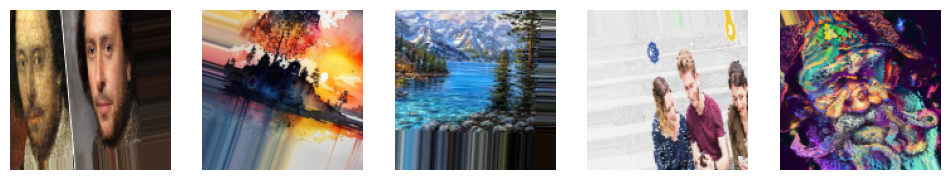

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Define augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Generate augmented images
augmented_images = datagen.flow(X_train[:5], batch_size=5)

# Display augmented images
fig, axes = plt.subplots(1, 5, figsize=(12, 4))
for i, img in enumerate(augmented_images):  # Only one batch of 5 images
    if i >= 1:  # Only process the first batch
        break
    for j in range(5):  # Loop through the 5 images in the batch
        axes[j].imshow(img[j])  # img[j] is the individual image in the batch
        axes[j].axis("off")
plt.show()

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Build CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation="relu"),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(len(categories), activation="softmax")  # Number of categories
])

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,304,898 (12.61 MB)

 Trainable params: 3,304,898 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
history = model.fit(datagen.flow(X_train, y_train, batch_size=BATCH_SIZE),
                    validation_data=(X_val, y_val),
                    epochs=30,
                    verbose=1)

Epoch 1/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 11s 397ms/step - accuracy: 0.5181 - loss: 0.9051 - val_accuracy: 0.6582 - val_loss: 0.6804
Epoch 2/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 7s 317ms/step - accuracy: 0.5437 - loss: 0.6895 - val_accuracy: 0.7089 - val_loss: 0.6598
Epoch 3/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 7s 298ms/step - accuracy: 0.5666 - loss: 0.6743 - val_accuracy: 0.7089 - val_loss: 0.5973
Epoch 4/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 7s 295ms/step - accuracy: 0.6145 - loss: 0.6597 - val_accuracy: 0.5570 - val_loss: 0.6675
Epoch 5/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 7s 307ms/step - accuracy: 0.5553 - loss: 0.6785 - val_accuracy: 0.6709 - val_loss: 0.6154
Epoch 6/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 7s 313ms/step - accuracy: 0.5618 - loss: 0.6772 - val_accuracy: 0.7215 - val_loss: 0.6209
Epoch 7/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 7s 306ms/step - accuracy: 0.5814 - loss: 0.6581 - val_accuracy: 0.7468 - val_loss: 0.5961
Epoch 8/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 7s 311ms/step - accuracy: 0.6145 - loss: 0.6556 - val_accuracy: 0

In [15]:
loss,acc=model.evaluate(X_train,y_train)

22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.7447 - loss: 0.5343


In [16]:
loss,acc=model.evaluate(X_test,y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.7583 - loss: 0.5004


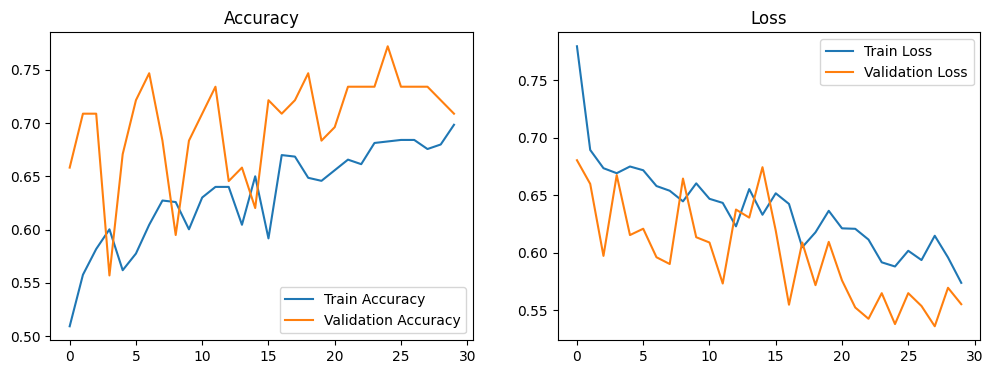

In [17]:
# Plot Accuracy and Loss Curves
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.legend()
plt.title("Accuracy")

plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.title("Loss")

plt.show()

In [19]:
model.save('Custom_Model.h5')

In [22]:
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout

base_model = Xception(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(1, activation='sigmoid')(x)

m= Model(inputs=base_model.input, outputs=x)
m.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [23]:
history = m.fit(datagen.flow(X_train, y_train, batch_size=BATCH_SIZE),
                    validation_data=(X_val, y_val),
                    epochs=6,
                    verbose=1)

Epoch 1/6
22/22 ━━━━━━━━━━━━━━━━━━━━ 135s 5s/step - accuracy: 0.6173 - loss: 0.6441 - val_accuracy: 0.6582 - val_loss: 4.4084
Epoch 2/6
22/22 ━━━━━━━━━━━━━━━━━━━━ 102s 5s/step - accuracy: 0.8131 - loss: 0.5383 - val_accuracy: 0.7089 - val_loss: 4.4570
Epoch 3/6
22/22 ━━━━━━━━━━━━━━━━━━━━ 95s 4s/step - accuracy: 0.7779 - loss: 0.4906 - val_accuracy: 0.7468 - val_loss: 3.4882
Epoch 4/6
22/22 ━━━━━━━━━━━━━━━━━━━━ 94s 4s/step - accuracy: 0.8001 - loss: 0.4500 - val_accuracy: 0.7722 - val_loss: 2.3152
Epoch 5/6
22/22 ━━━━━━━━━━━━━━━━━━━━ 94s 4s/step - accuracy: 0.8701 - loss: 0.3471 - val_accuracy: 0.6709 - val_loss: 1.5877
Epoch 6/6
22/22 ━━━━━━━━━━━━━━━━━━━━ 95s 4s/step - accuracy: 0.8452 - loss: 0.3789 - val_accuracy: 0.7722 - val_loss: 3.4734


In [24]:
loss,acc=m.evaluate(X_test,y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.7583 - loss: 0.5004


In [26]:
loss,acc=m.evaluate(X_train,y_train)

22/22 ━━━━━━━━━━━━━━━━━━━━ 16s 748ms/step - accuracy: 0.7733 - loss: 1.4662


In [ ]:
m.save('models/m2.h5')